Generate the (book_id,genre) Pair

In [23]:
import pandas as pd
file_path = "goodreads_book_genres_initial.json"

In [24]:
d = []
with open(file_path) as f:
    for l in f:
        d.append(l)

In [104]:
def maxtag(line):
    t = gettag(line)
    if t==-1:
        return -1
    else:
        return max(t,key=lambda item:item[1])[0]
def getuser(line):
    return int(line.split('genres":')[0].split('book_id":')[1][2:-4])
def gettag(line):
    a = line.split('genres":')[1][3:-3].split(', \"')
    if len(a[0])==0:
        return -1
    return [(i.split(":")[0].strip('\"'),int(i.split(":")[1])) for i in a]


In [105]:
taglist = []
userlist = []
for dd in d:
    t = maxtag(dd)
    if t!=-1:
        taglist.append(t)
        userlist.append(getuser(dd))

In [27]:
removed_d = []
for dd in new_d:
    if len(dd[0])!=0:
        removed_d.append(dd)

In [106]:
df = pd.DataFrame()
df['book_id'] = userlist
df['genres'] = taglist
df.head()

,book_id,genres
0,5333265,"history, historical fiction, biography"
1,1333909,fiction
2,7327624,"fantasy, paranormal"
3,6066819,fiction
4,287140,non-fiction


In [107]:
len(df)

1951142

In [109]:
df.genres.value_counts()

fiction                                   435045
non-fiction                               335632
romance                                   276087
fantasy, paranormal                       221908
mystery, thriller, crime                  194964
history, historical fiction, biography    177837
children                                  116941
comics, graphic                            91185
young-adult                                58368
poetry                                     43175
Name: genres, dtype: int64

In [ ]:
df.to_csv('book_genre.csv')

Visualize the UMAP Projection of the Item Factor

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
%matplotlib inline

In [51]:
def input(file1,file2):
    file = open(file1, "rb")
    #read the file to numpy array
    umap_x = np.load(file)
    file.close
    file = open(file2, "rb")
    #read the file to numpy array
    umap_label = np.load(file)
    file.close
    return umap_x, umap_label

In [96]:
def plot_umap(umap_x,umap_label,i,j):
    plt.figure(figsize=(10,8))
    plt.scatter(umap_x[:, 0], umap_x[:, 1], c=umap_label, cmap='Spectral',s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)).set_ticks(np.arange(10))
    plt.title('UMAP projection of itemFactor('+i+','+j+')', fontsize=15)
    plt.show()

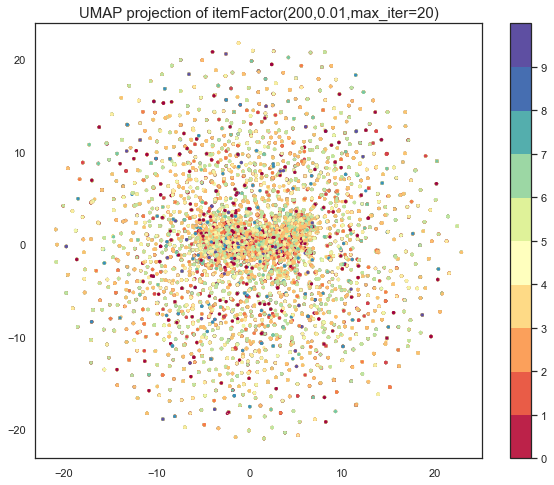

In [99]:
# On 1% of the dataset
umap_x, umap_label = input("umap_iter20_200_0.01","genre_number_iter20_200_0.01")
plot_umap(umap_x,umap_label,'200','0.01,max_iter=20')

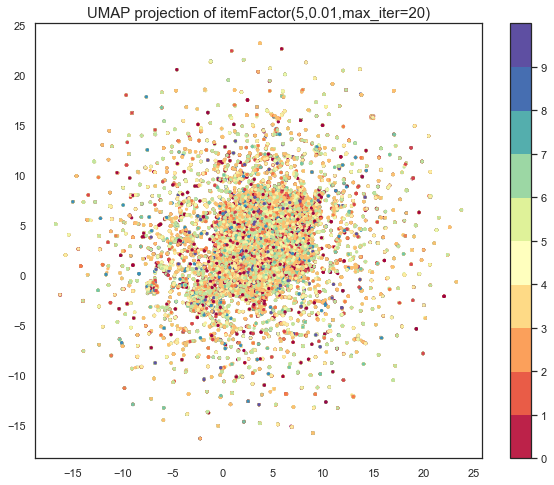

In [97]:
# On 1% of the dataset
umap_x, umap_label = input("umap_1_iter20_5_0.01","genre_number_1_iter20_5_0.01")
plot_umap(umap_x,umap_label,'5','0.01,max_iter=20')

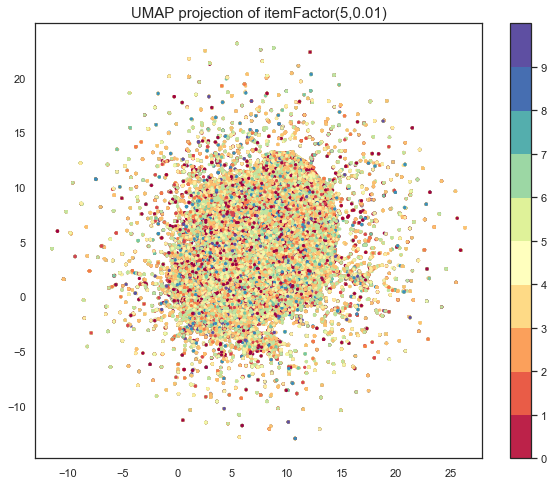

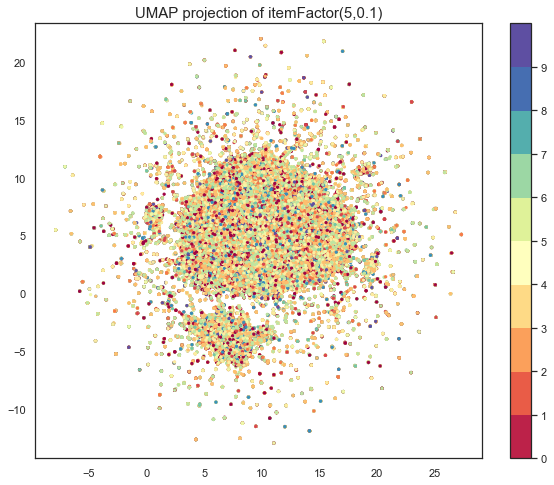

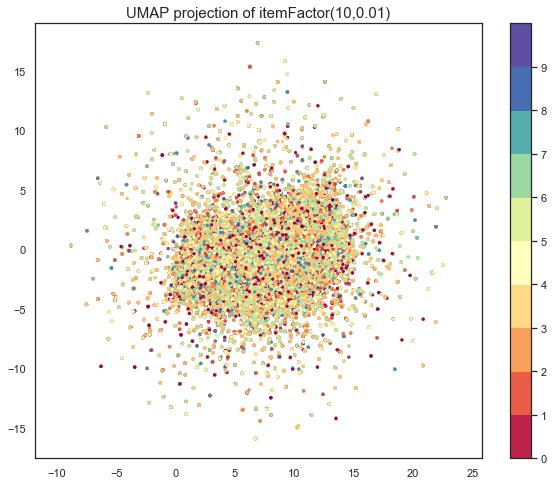

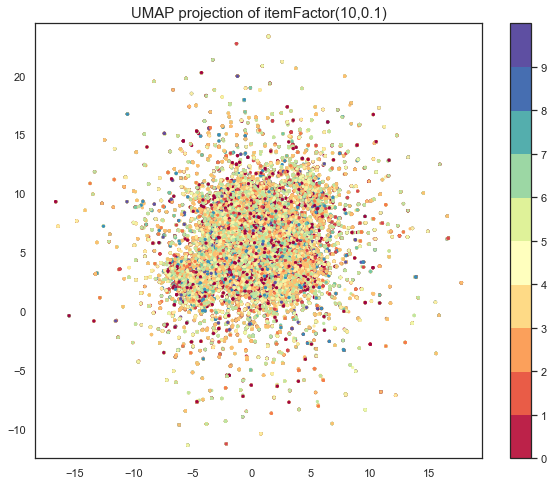

In [101]:
# On 10% of the dataset
for i in ['5','10']:
    for j in ['0.01','0.1']:
        umap_x, umap_label = input('umap_'+i+'_'+j,'genre_number_'+i+'_'+j)
        plot_umap(umap_x,umap_label,i,j)

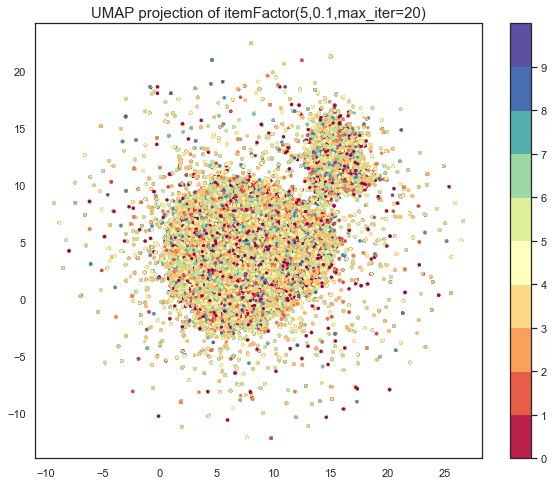

In [102]:
# On 10% of the dataset
umap_x, umap_label = input("umap_20_5_0.1","genre_number_10_20_5_0.1")
plot_umap(umap_x,umap_label,'5','0.1,max_iter=20')